Manual check for birhytmicity based on birhythmicity_results.json

In [6]:
from ode_functions import check_line_list,param_line, plot_time_series_one_var,make_parameters,fun,ic_function
from classify_orbits import IC_location
import scipy.integrate

In [14]:
#import parameters
label = 'TM1F'
params = make_parameters(label,100)

In [15]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 50

In [18]:
p_line = param_line(params[48],params[3],25)#parameter pairs should be entered here. 
check_line_list([p_line])

['Large' 'Large' 'Large' 'Large' 'Large' 'Large' 'Large' 'Large' 'Large'
 'Large' 'Large' 'Large' 'Large' 'Small' 'Small' 'Large' 'Small' 'Large'
 'Large' 'Small' 'Small' 'Small' 'Small' 'Small' 'Small'] ['Large' 'Large' 'Large' 'Large' 'Large' 'Large' 'Large' 'Large' 'Large'
 'Large' 'Large' 'Small' 'Large' 'Large' 'Large' 'Small' 'Large' 'Small'
 'Large' 'Large' 'Small' 'Small' 'Small' 'Small' 'Small']


[True]

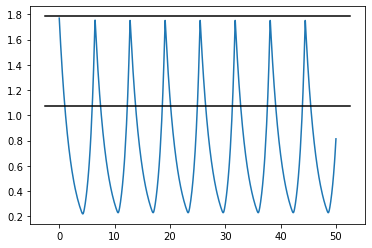

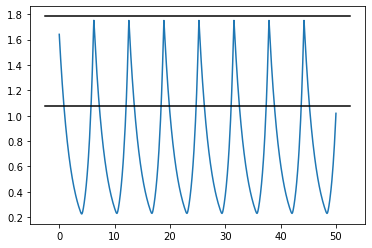

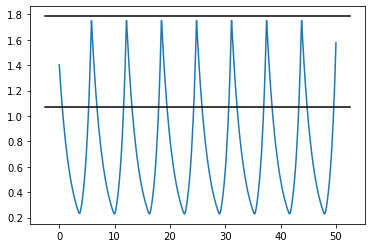

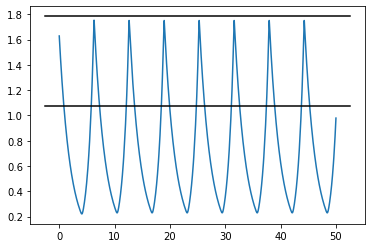

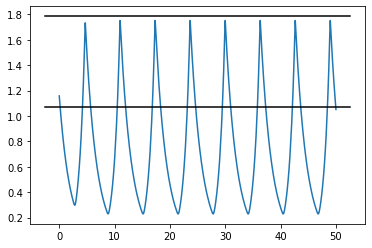

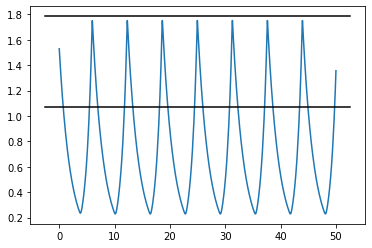

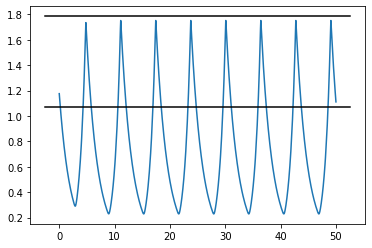

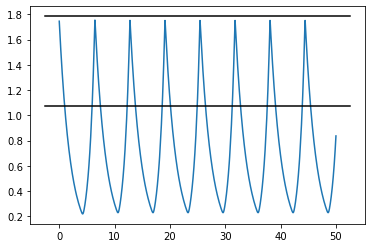

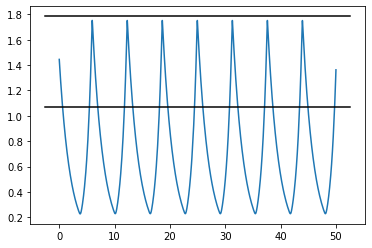

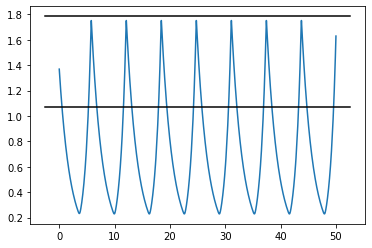

In [20]:
p = p_line[17]
IC_domain = IC_location(label)
ICs = ic_function(IC_domain,p,10)
for i in range(ICs.shape[0]):
    cur_IC = ICs[i,:]
    sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,p,n,decays),[0,tf],y0 = cur_IC,method = 'BDF',rtol = 1e-5,atol = 1e-8)
    plot_time_series_one_var(sol,p,2)